# Metrics Visualizations

In [1]:
from Data.data_dicts import character_dict, source_dict, random_state

character = 'Barney' # 'Barney' | 'Sheldon' | 'Harry' | 'Fry' | 'Vader' | 'Joey' | 'Phoebe' | 'Bender' | Default'
character_2 = 'Joey'

In [2]:
# Mount google drive
import os
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
    os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    base_folder = '/content/drive/My Drive/unibo/NLP_project/BarneyBot'
    os.system("pip install datasets")
    os.system("pip install transformers")
    os.system("pip install rouge_score")
    os.system("pip install -U sentence-transformers")
else:
    base_folder = os.getcwd()
    
in_data1_folder = os.path.join(base_folder, 'Data', 'Characters', character)
if not os.path.exists(in_data1_folder):
    os.makedirs(in_data1_folder)

in_data2_folder = os.path.join(base_folder, 'Data', 'Characters', character_2)
if not os.path.exists(in_data2_folder):
    os.makedirs(in_data2_folder)

in_metrics_folder = os.path.join(base_folder, 'Metrics')
if not os.path.exists(in_metrics_folder):
    os.makedirs(in_metrics_folder)

In [3]:
import pandas as pd
import tensorflow as tf
import json
import numpy as np
import time
import scipy as sp

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import itertools
from Lib.BBRadar import BBRadar
import warnings
warnings.filterwarnings("ignore")

## Data plots

In [5]:
from datasets import load_dataset, DatasetDict

def load_df(character):
    dataset_path = os.path.join(base_folder, "Data", "Characters", character, character+'.csv')
    
    character_hg = load_dataset('csv', 
                                data_files=dataset_path, 
                                cache_dir=os.path.join(base_folder, "cache"))
    
    # 85% train / 10% test / 5% validation
    train_test_hg = character_hg['train'].train_test_split(test_size=0.15, seed=random_state)
    test_val = train_test_hg['test'].train_test_split(test_size=0.33, seed=random_state)
    
    
    character_hg = DatasetDict({
        'train': train_test_hg['train'],
        'test': test_val['train'],
        'val': test_val['test']
    })
    
    return character_hg

In [6]:
os.environ["HF_DATASETS_CACHE"] = os.path.join(base_folder, "cache")
character_hg = load_df(character)
character_2_hg = load_df(character_2)

Using custom data configuration default-56c51f8ee6504638
Reusing dataset csv (C:\Users\User\Documents\GitHub\cache\csv\default-56c51f8ee6504638\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached split indices for dataset at C:\Users\User\Documents\GitHub\cache\csv\default-56c51f8ee6504638\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-482310c4cee47aea.arrow and C:\Users\User\Documents\GitHub\cache\csv\default-56c51f8ee6504638\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-b479af047c7a3a8a.arrow
Loading cached split indices for dataset at C:\Users\User\Documents\GitHub\cache\csv\default-56c51f8ee6504638\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-7e5ed690a036d827.arrow and C:\Users\User\Documents\GitHub\cache\csv\default-56c51f8ee6504638\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-65fad66bfddf0a70.arrow
Using custom data configuration default-4a4b13361a352013
Reusing dataset csv (C:\Users\User\Documents\GitHub\cache\csv\default-4a4b13361a352013\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached split indices for dataset at C:\Users\User\Documents\GitHub\cache\csv\default-4a4b13361a352013\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-fbb971f522249e5e.arrow and C:\Users\User\Documents\GitHub\cache\csv\default-4a4b13361a352013\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-6cfd3219d21d921e.arrow
Loading cached split indices for dataset at C:\Users\User\Documents\GitHub\cache\csv\default-4a4b13361a352013\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-ef694798657e2b08.arrow and C:\Users\User\Documents\GitHub\cache\csv\default-4a4b13361a352013\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-02e46530f30d89ce.arrow


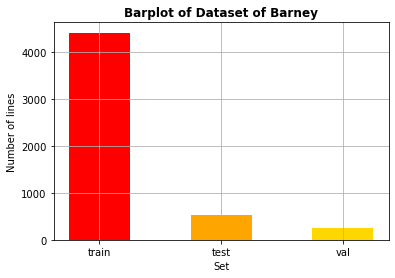

In [7]:
labels = [hgdict for hgdict in character_hg]
data   = np.array([len(character_hg[hgdict]) for hgdict in character_hg])
colors = ['red', 'orange', 'gold']

plt.bar(labels, data, 0.5,
        color= colors)
plt.xlabel('Set')
plt.ylabel('Number of lines')
plt.title('Barplot of Dataset of ' + character, fontweight="bold")
plt.grid(True)
plt.show()

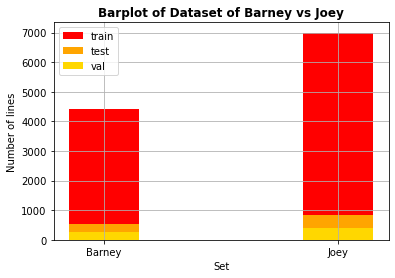

In [8]:
labels = [character, character_2]
data   = [(len(character_hg[hgdict]), len(character_2_hg[hgdict])) for hgdict in character_hg]

fig, ax = plt.subplots()
for hgdict, i in zip(character_hg, range(len(character_hg))):
    ax.bar(labels, data[i], 0.3, color=colors[i], label=hgdict)

ax.set_xlabel('Set')
ax.set_ylabel('Number of lines')
ax.set_title('Barplot of Dataset of ' + character + ' vs ' + character_2, fontweight="bold")
ax.legend()
ax.grid(True)
plt.show()

## Metrics result

In [9]:
base_metrics          = character+'_base_metrics.json'
base_metrics_sampling = character+'_sampling_comparison_metrics.json'
c1_vs_c2_metrics      = character+'_vs_'+character_2+'_metrics.json'
c1_vs_nf_metrics      = character+'_vs_nonfinetuned_metrics.json'

In [10]:
base_metrics_path          = os.path.join(base_folder, "Metrics", base_metrics)
base_metrics_sampling_path = os.path.join(base_folder, "Metrics", base_metrics_sampling)
c1_vs_c2_metrics_path      = os.path.join(base_folder, "Metrics", c1_vs_c2_metrics)
c1_vs_nf_metrics_path      = os.path.join(base_folder, "Metrics", c1_vs_c2_metrics)

### Base Metrics

In [11]:
if os.path.exists(base_metrics_path):
    print("Loading predictions from", base_metrics)
    with open(base_metrics_path, 'r') as file:
        json_string = file.read()
    metrics = json.loads(json_string)
    print("Loaded predictions from stored file")
else:
    print("Loading", base_metrics, "failed!")

Loading predictions from Barney_base_metrics.json
Loaded predictions from stored file


In [12]:
def metric_info(metrics, character, character_2=None, cols=4, colors=None):
    ordering = metrics['metadata']['ordering']
    colors = ['tab:blue', 'tab:orange', 'tab:orange', 'tab:red'] 
    
    metrics_size = len(metrics) + 1
    if not metrics_size % cols == 0:
        rows = metrics_size // cols + 1
    else:
        rows = metrics_size // cols
    
    fig = plt.figure(figsize=(20, 10), facecolor='white')
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.8)
    idx = 1
    
    # semantic similarity
    m = 'semantic similarity'
    data = []
    std  = []
    for s in metrics[m]:
        try:
            data.append(s['score'])
            std.append(s['std'])
        except:
            data.append(s)
            std.append(0)
    ax = fig.add_subplot(rows, cols, idx)
    ax.bar(ordering, np.array(data), 0.3, yerr=std, color=colors)
    ax.set_title(m,fontweight="bold")
    ax.set_ylim([0,1])
    ax.set_xticklabels(ordering, rotation=25)
    ax.grid(True)
    idx += 1
    
    # perplexity
    print('perplexity skip')
    
    # bleu
    m = 'bleu'
    data = []
    std  = []
    for s in metrics[m]:
        try:
            data.append(s['score'])
            std.append(s['std'])
        except:
            data.append(s)
            std.append(0)
    ax = fig.add_subplot(rows, cols, idx)
    ax.bar(ordering, np.array(data), 0.3, yerr=std, color=colors)
    ax.set_title(m,fontweight="bold")
    ax.set_ylim([0,1])
    ax.set_xticklabels(ordering, rotation=25)
    ax.grid(True)
    idx += 1
    
    # rouge l
    m = 'rouge l'
    data = []
    std  = []
    for s in metrics[m]:
        try:
            data.append(s['score'])
            std.append(s['std'])
        except:
            data.append(s)
            std.append(0)
    ax = fig.add_subplot(rows, cols, idx)
    ax.bar(ordering, np.array(data), 0.3, yerr=std, color=colors)
    ax.set_title(m,fontweight="bold")
    ax.set_ylim([0,1])
    ax.set_xticklabels(ordering, rotation=25)
    ax.grid(True)
    idx += 1
    
    # distinct
    m = 'distinct'
    data = []
    std  = []
    for s in metrics[m]:
        try:
            data.append(s['score'])
            std.append(s['std'])
        except:
            data.append(s)
            std.append(0)
    ax = fig.add_subplot(rows, cols, idx)
    ax.bar(ordering, np.array(data), 0.3, yerr=std, color=colors)
    ax.set_title(m,fontweight="bold")
    ax.set_ylim([0,1])
    ax.set_xticklabels(ordering, rotation=25)
    ax.grid(True)
    idx += 1
    
    # emotion
    m = 'emotion'
    data = []
    std  = []
    for s in metrics[m]:
        try:
            data.append(s['score'])
            std.append(s['std'])
        except:
            data.append(s)
            std.append(0) 
    labels = metrics[m][0]['label']
    print("pearson correlation skip")
    # 0 - context, 1 - label, 2 - chatbot 
    radar = BBRadar(labels, data[0], data[1], ordering[0]) # context
    radar.subplotEmotionsRadar(rows, cols, fig, idx, legend=ordering[0].split('-'), colors=['tab:orange', 'tab:blue'])
    idx +=1
    radar = BBRadar(labels, data[0], data[2], ordering[1]) # label 
    radar.subplotEmotionsRadar(rows, cols, fig, idx, legend=ordering[1].split('-'), colors=['tab:orange', 'tab:blue'])
    idx +=1
    radar = BBRadar(labels, data[2], data[1], ordering[2]) # chatbot
    radar.subplotEmotionsRadar(rows, cols, fig, idx, legend=ordering[2].split('-'), colors=['tab:orange', 'tab:blue'])
    idx +=1

    
    # semantic answer similarity
    m = 'semantic answer similarity'
    data = []
    std  = []
    for s in metrics[m]:
        try:
            data.append(s['score'])
            std.append(s['std'])
        except:
            data.append(s)
            std.append(0)
    ax = fig.add_subplot(rows, cols, idx)
    ax.bar(ordering, np.array(data), 0.3, yerr=std, color=colors)
    ax.set_title(m,fontweight="bold")
    ax.set_ylim([0,1])
    ax.set_xticklabels(ordering, rotation=25)
    ax.grid(True)
    idx += 1
    
    # semantic classifier
    m = 'semantic classifier'
    data = []
    std  = []
    for s in metrics[m]:
        data.append(s['score'])
        std.append(s['std'])
    ax = fig.add_subplot(rows, cols, idx)
    labels = ordering[2].split('-')
    labels.reverse()
    ax.bar(labels, np.array(data), 0.3, yerr=std, color=['tab:orange', 'tab:blue'])
    ax.set_title(m,fontweight="bold")
    ax.set_ylim([0,1])
    ax.set_xticklabels(labels, rotation=25)
    ax.grid(True)
    idx += 1
    
    if character_2 == None:
        title = 'Metrics ' + character
    else:
        title = 'Metrics ' + character + ' vs ' + character_2
    fig.text(0.2, 0.965, title, horizontalalignment='center', color='black', weight='bold',
             size=22)

perplexity skip
pearson correlation skip


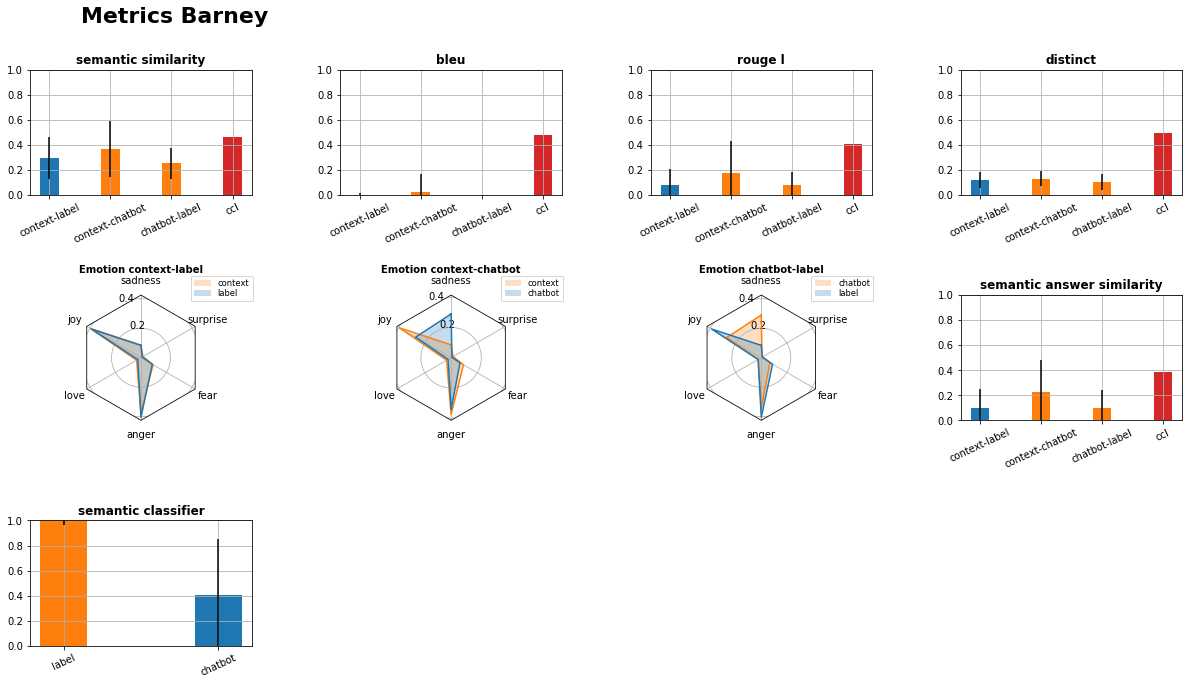

In [13]:
metric_info(metrics, character)

### Base Metrics Sampling

In [68]:
if os.path.exists(base_metrics_sampling_path):
    print("Loading predictions from", base_metrics_sampling)
    with open(base_metrics_sampling_path, 'r') as file:
        json_string = file.read()
    metrics = json.loads(json_string)
    print("Loaded predictions from stored file")
else:
    print("Loading", base_metrics, "failed!")

Loading predictions from Barney_sampling_comparison_metrics.json
Loaded predictions from stored file


perplexity skip
pearson correlation skip


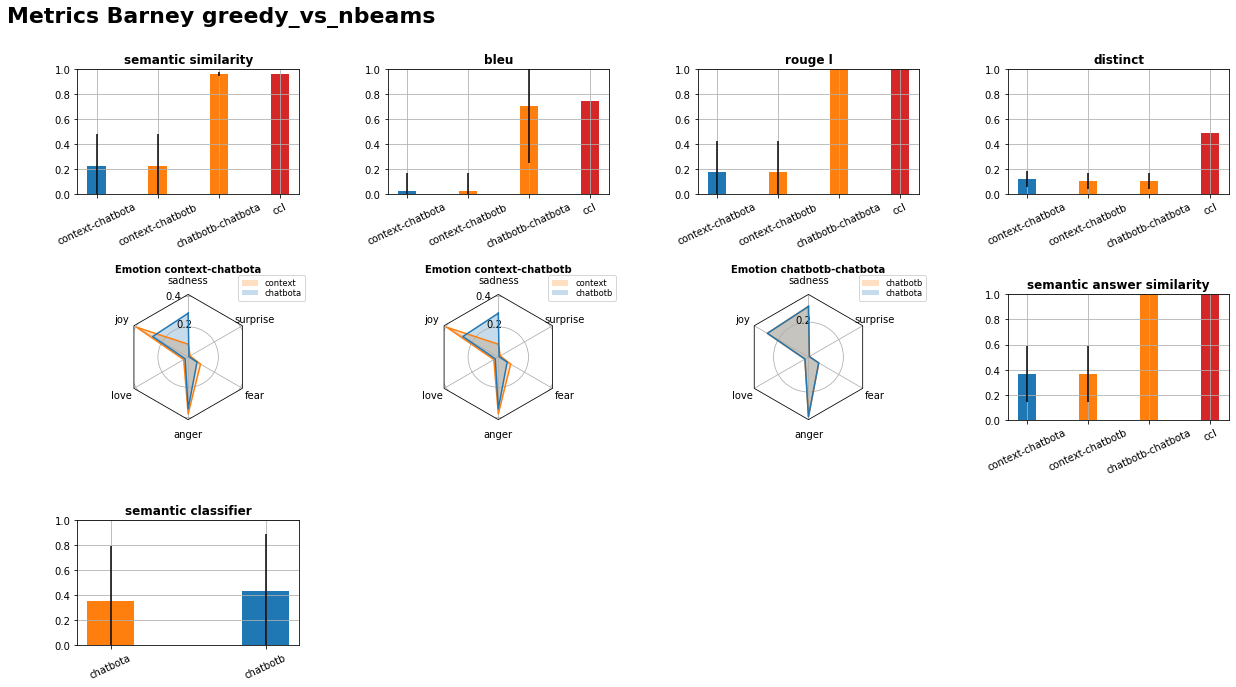

In [72]:
metric_info(metrics['greedy_vs_nbeams'], character + ' ' + 'greedy_vs_nbeams')

perplexity skip
pearson correlation skip


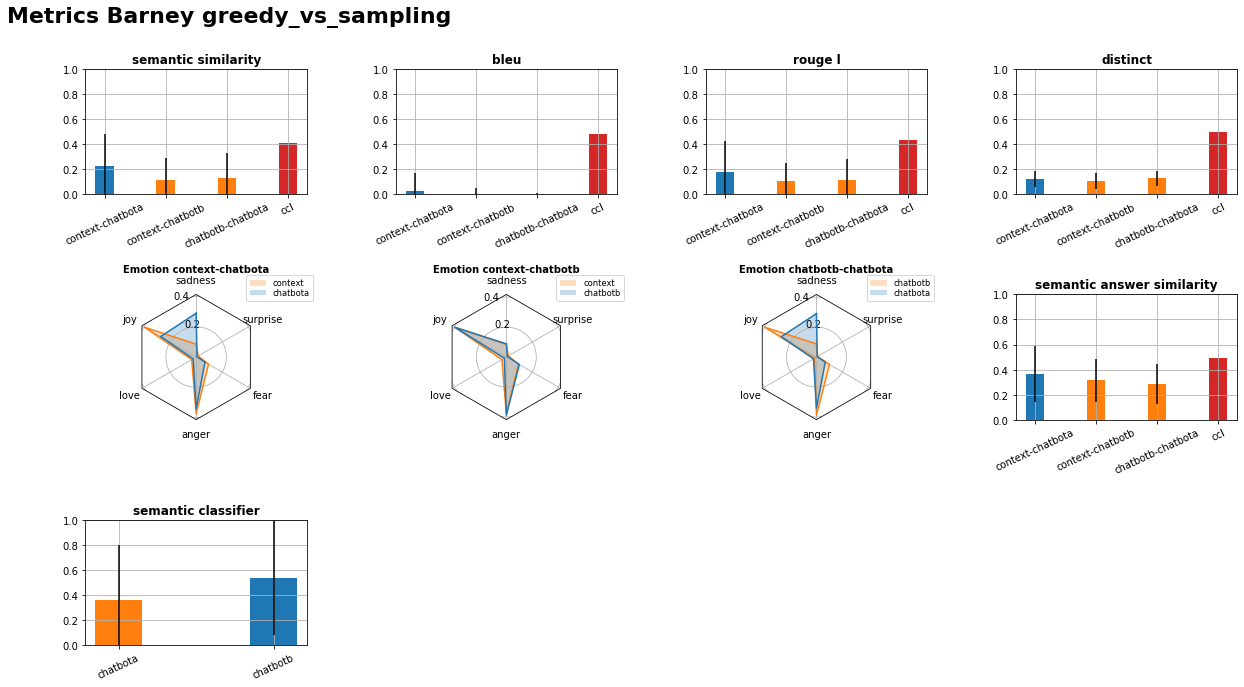

In [73]:
metric_info(metrics['greedy_vs_sampling'], character + ' ' + 'greedy_vs_sampling')

perplexity skip
pearson correlation skip


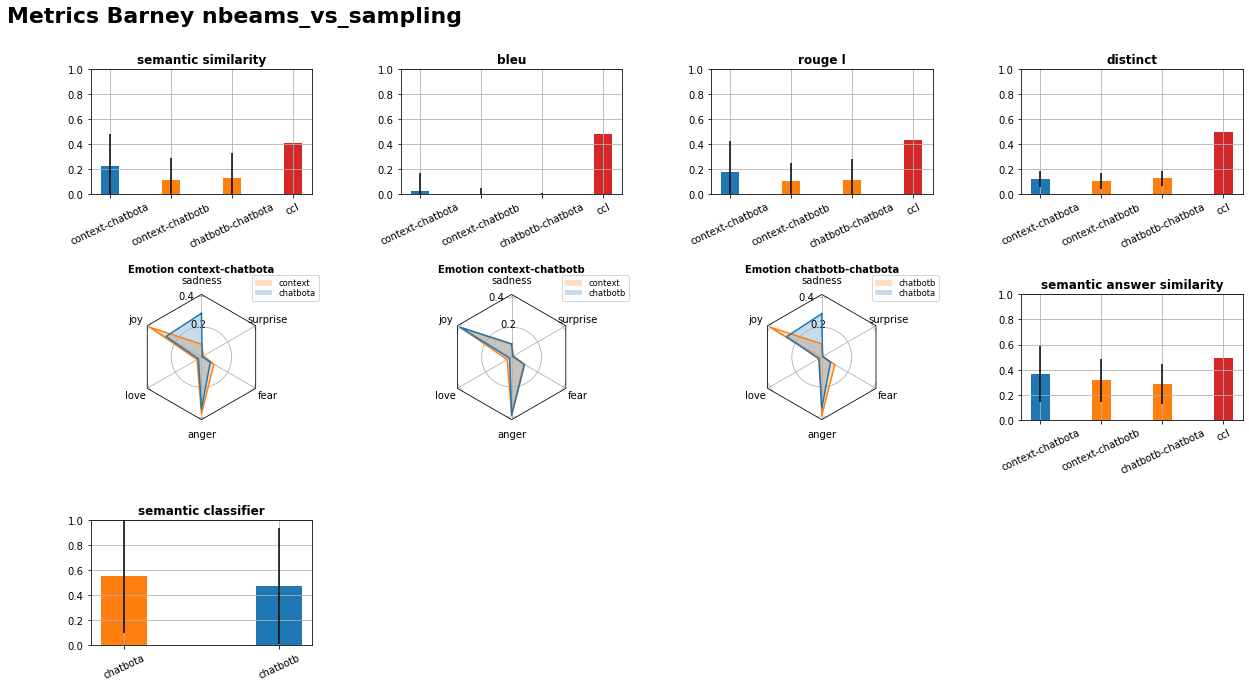

In [74]:
metric_info(metrics['nbeams_vs_sampling'], character + ' ' + 'nbeams_vs_sampling')

### Character 1 vs Not finetuned

In [77]:
if os.path.exists(c1_vs_nf_metrics_path):
    print("Loading predictions from", c1_vs_nf_metrics)
    with open(c1_vs_nf_metrics_path, 'r') as file:
        json_string = file.read()
    metrics = json.loads(json_string)
    print("Loaded predictions from stored file")
else:
    print("Loading", base_metrics, "failed!")

Loading predictions from Barney_vs_nonfinetuned_metrics.json
Loaded predictions from stored file


perplexity skip
pearson correlation skip


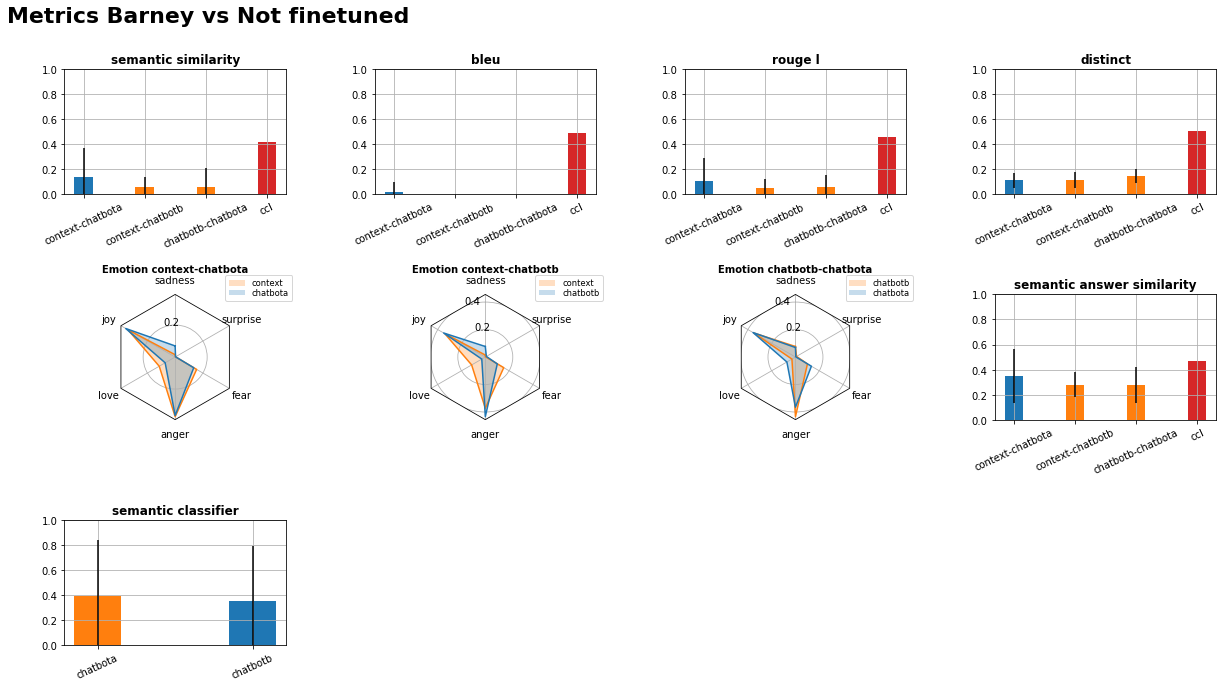

In [80]:
metric_info(metrics, character + ' vs Not finetuned')